# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float") / 255.
x_test = x_test.astype("float") / 255.

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

## Task 3: Adding Noise
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [3]:
SCALE_FACTOR = 0.9
x_train_noisy = x_train + np.random.rand(60000, 784) * SCALE_FACTOR
x_test_noisy = x_test + np.random.rand(10000, 784) * SCALE_FACTOR

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

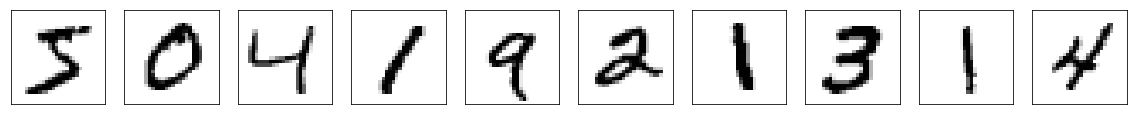

In [6]:
def plot(x, p, labels=False):
    plt.figure(figsize=(20, 2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i].reshape(28, 28), cmap="binary")
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    
plot(x_train, None)

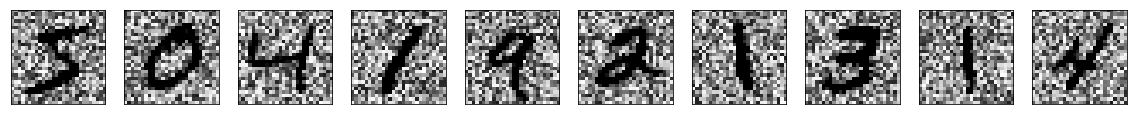

In [7]:
plot(x_train_noisy, None)

## Task 4: Building and Training a Classifier
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [13]:
classifier = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

classifier.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

classifier.fit(x_train, y_train, batch_size = 256, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3248 - acc: 0.9115
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.1175 - acc: 0.9655
Epoch 3/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0772 - acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0566 - acc: 0.9827
Epoch 5/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0405 - acc: 0.9874


In [14]:
classifier.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 83us/step


[0.07171001766305417, 0.9786]

In [15]:
classifier.evaluate(x_test_noisy, y_test)

10000/10000 [==============================] - 1s 86us/step


[7.141166477203369, 0.2524]

## Task 5: Building the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [16]:
input_image = Input(shape = (784,))
encoded = Dense(64, activation = "relu")(input_image)

decoded = Dense(784, activation = "sigmoid")(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(
    loss = "binary_crossentropy",
    optimizer = "adam"
)

## Task 6: Training the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [18]:
autoencoder.fit(
    x_train_noisy, x_train, 
    batch_size = 128, epochs = 100,
    validation_split = 0.2, verbose = 1, 
    callbacks = [
        EarlyStopping(monitor = "val_loss", patience = 5)
    ]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 149us/step - loss: 0.2455 - val_loss: 0.1897
Epoch 2/100
48000/48000 [==============================] - 6s 134us/step - loss: 0.1727 - val_loss: 0.1584
Epoch 3/100
48000/48000 [==============================] - 6s 129us/step - loss: 0.1477 - val_loss: 0.1398
Epoch 4/100
48000/48000 [==============================] - 6s 130us/step - loss: 0.1333 - val_loss: 0.1292
Epoch 5/100
48000/48000 [==============================] - 6s 134us/step - loss: 0.1246 - val_loss: 0.1225
Epoch 6/100
48000/48000 [==============================] - 6s 131us/step - loss: 0.1191 - val_loss: 0.1181
Epoch 7/100
48000/48000 [==============================] - 6s 129us/step - loss: 0.1153 - val_loss: 0.1149
Epoch 8/100
48000/48000 [==============================] - 6s 129us/step - loss: 0.1125 - val_loss: 0.1125
Epoch 9/100
48000/48000 [==============================] - 6s 130us/step - loss: 0.1104 - val_

## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [20]:
preds = autoencoder.predict(x_test_noisy)

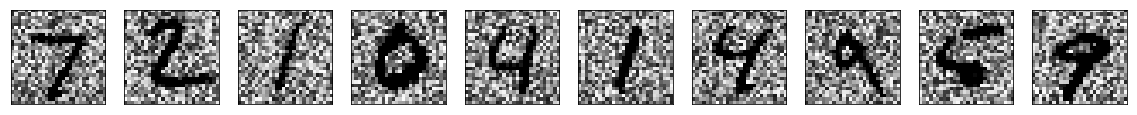

In [21]:
plot(x_test_noisy, None)

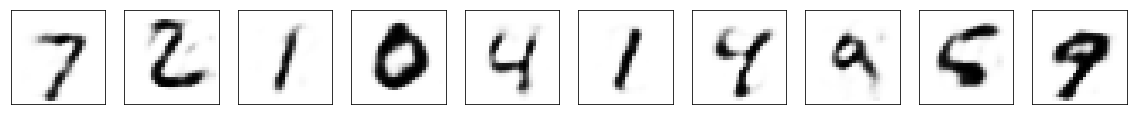

In [22]:
plot(preds, None)

In [24]:
classifier.evaluate(preds, y_test)

10000/10000 [==============================] - 1s 87us/step


[0.14949795630164445, 0.9533]

## Task 8: Composite Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [25]:
input_image = Input(shape = (784,))
x = autoencoder(input_image)
y = classifier(x)

compModel = Model(input_image, y)

In [26]:
preds = compModel.predict(x_test_noisy)

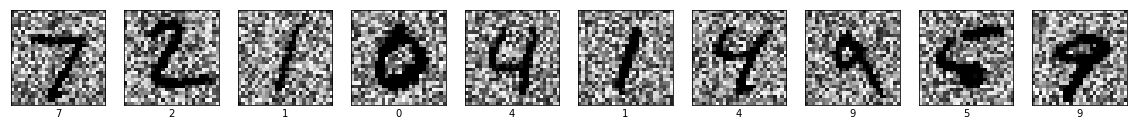

In [27]:
plot(x_test_noisy, preds, True)

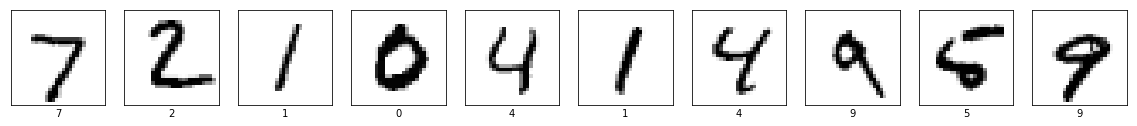

In [28]:
plot(x_test, to_categorical(y_test), True)